In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [20]:
dataset=pd.read_csv('/content/breast cancer diagnosis .csv')

In [21]:
print(dataset.shape)

(286, 13)


In [22]:
print(dataset.head())

   Start Age  End Age menopause  Start tumor size  End tumor size  \
0         40       49   premeno                15              19   
1         50       59      ge40                15              19   
2         50       59      ge40                35              39   
3         40       49   premeno                35              39   
4         40       49   premeno                30              34   

   Start_env_nodes  end_env_nodes node-caps  deg-malig breast breast-quad  \
0                0              2       yes          3  right     left_up   
1                0              2        no          1  right     central   
2                0              2        no          2   left    left_low   
3                0              2       yes          3  right    left_low   
4                3              5       yes          2   left    right_up   

  irradiat                 Class  
0       no     recurrence-events  
1       no  no-recurrence-events  
2       no     re

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start Age         286 non-null    int64 
 1   End Age           286 non-null    int64 
 2   menopause         286 non-null    object
 3   Start tumor size  286 non-null    int64 
 4   End tumor size    286 non-null    int64 
 5   Start_env_nodes   286 non-null    int64 
 6   end_env_nodes     286 non-null    int64 
 7   node-caps         278 non-null    object
 8   deg-malig         286 non-null    int64 
 9   breast            286 non-null    object
 10  breast-quad       285 non-null    object
 11  irradiat          286 non-null    object
 12  Class             286 non-null    object
dtypes: int64(7), object(6)
memory usage: 29.2+ KB


In [24]:
dataset.isnull().sum()

Start Age           0
End Age             0
menopause           0
Start tumor size    0
End tumor size      0
Start_env_nodes     0
end_env_nodes       0
node-caps           8
deg-malig           0
breast              0
breast-quad         1
irradiat            0
Class               0
dtype: int64

In [25]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['Class']=label_encoder.fit_transform(dataset['Class'])
dataset['Class'].unique()

array([1, 0])

In [26]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['menopause']=label_encoder.fit_transform(dataset['menopause'])
dataset['menopause'].unique()
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['node-caps']=label_encoder.fit_transform(dataset['node-caps'])
dataset['node-caps'].unique()
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['breast']=label_encoder.fit_transform(dataset['breast'])
dataset['breast'].unique()

array([1, 0])

In [27]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['breast-quad']=label_encoder.fit_transform(dataset['breast-quad'])
dataset['breast-quad'].unique()

array([2, 0, 1, 4, 3, 5])

In [28]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['irradiat']=label_encoder.fit_transform(dataset['irradiat'])
dataset['irradiat'].unique()

array([0, 1])

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Start Age         286 non-null    int64
 1   End Age           286 non-null    int64
 2   menopause         286 non-null    int64
 3   Start tumor size  286 non-null    int64
 4   End tumor size    286 non-null    int64
 5   Start_env_nodes   286 non-null    int64
 6   end_env_nodes     286 non-null    int64
 7   node-caps         286 non-null    int64
 8   deg-malig         286 non-null    int64
 9   breast            286 non-null    int64
 10  breast-quad       286 non-null    int64
 11  irradiat          286 non-null    int64
 12  Class             286 non-null    int64
dtypes: int64(13)
memory usage: 29.2 KB


In [32]:
X=dataset.drop('Class',axis=1)
y=dataset['Class']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)

In [34]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=mlr.predict(X_test)
np.set_printoptions(precision=0)
y_pred

array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -0.,
        0.,  1.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.])

In [36]:
y_test

55     0
181    1
92     1
207    1
188    0
45     1
111    0
239    1
15     0
22     0
267    1
194    0
12     0
81     0
63     1
191    0
225    0
171    1
201    0
136    0
154    0
236    0
101    1
280    0
106    1
110    0
218    1
227    0
126    0
285    0
213    0
8      0
5      0
200    0
90     1
281    0
97     0
103    0
7      0
64     1
73     1
159    0
179    0
205    1
241    0
124    0
158    0
208    1
74     1
270    1
59     1
279    0
271    1
222    0
76     0
150    1
252    0
20     1
Name: Class, dtype: int64

In [38]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [41]:
y_pred1=lr.predict(X_test)
y_pred1

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [42]:
y_test

55     0
181    1
92     1
207    1
188    0
45     1
111    0
239    1
15     0
22     0
267    1
194    0
12     0
81     0
63     1
191    0
225    0
171    1
201    0
136    0
154    0
236    0
101    1
280    0
106    1
110    0
218    1
227    0
126    0
285    0
213    0
8      0
5      0
200    0
90     1
281    0
97     0
103    0
7      0
64     1
73     1
159    0
179    0
205    1
241    0
124    0
158    0
208    1
74     1
270    1
59     1
279    0
271    1
222    0
76     0
150    1
252    0
20     1
Name: Class, dtype: int64

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred)
cm2= confusion_matrix(y_test,y_pred1)
print("Confusin Matrix: ")
print(cm1)
print(cm2)

Confusin Matrix: 
[[35  1]
 [16  6]]
[[35  1]
 [16  6]]


In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7068965517241379


In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7068965517241379


0.6224747474747474


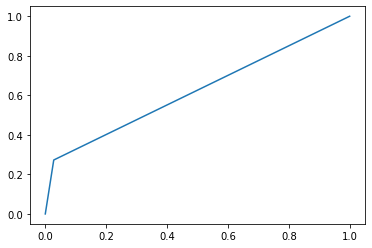

In [47]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)

0.6224747474747474


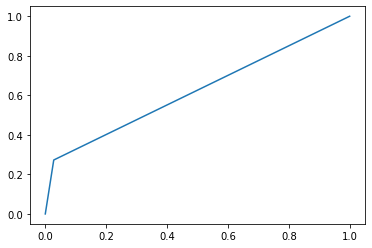

In [48]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)